### Part 1 - Website selection {-}

The website selected as a testbed for this prototype scraper was the BBC - a broadcaster based in the United Kingdom with a global audience and extensive news content on a wide variety of topics. Whilst a number of other similar websites were considered, including those based in the Australia, they were all ultimately discarded due to either the use of a paywall or technical features (iFrames and shadow Document Object Models (DOMs)) that proved to be beyond the current skills of the author.

The BBC News website provided a rich source of text and other relevant metadata that would be more than suitable in developing a set of NLP products to help determine the extent to which news sensationalism was practiced by current broadcasters. In particular, the items of significant interest were news headlines, article descriptions and topics.

It was decided during the planning phase that the entire text of stories should not be extracted as this could either breach or come close to breaching the Terms of Use of many broadcasters. The BBC had a relatively strong stance on this point, and stated that any use of content from their news website required permission (The BBC, 2019).

Ultimately, the content of approximately 600 stories was scraped from thirteen BBC News webpages[^1][^2]. This produced an initial raw dataset of 8,282 stories once duplicates (based on headline name) were removed and had timestamps ranging from 17 May 2014 to 16 April 2021.

The content layout appeared relatively simple as the scraper was going to target the "Latest News" section of each webpage. For example, each story within the section followed the same layout with specific elements in particular places within the DOM structure. However, locating the section required thought as the section headline was one level to far down to be able to be used for that purpose and not all stories had all the target elements - both on the initial tile and within the associated hyperlink (if that also existed). One additional layer of complexity was the use of pagination buttons, which the scraper was going to have to be able to handle.

[^1]: Coronavirus, World, Asia, UK, Business, Tech, Science, Entertainment & Arts, Health, Australia, In Pictures, Reality Check and Long Reads.  
[^2]: The "Long Reads" webpage was only 30 pages at the time the scraper was run, which equates to 600 stories.  


### Part 2 - Web scraper workflow  {-}

The framework chosen for this prototype was selenium. Whilst selenium was originally developed and intended to be used as a tool for web testing (Selenium, n.d.), some of its features have meant that it is also well-suited for web scraping projects. For example, selenium can both send web requests and parse HTML (an advantage over beautiful soup) and can load javascript without additional user requests (an advantage over scrapy).

The scraper consisted of four functions. The first two functions dealt with preliminary content extraction. They took in a list of BBC News webpage URLs and the number of pages content was to be extracted from. The scraper then navigated to those webpages one at a time and located the "Latest News" section of each webpage. Upon doing so, it attempted to locate and extract the headline, description and hyperlink for each story. Once this was complete, the scraper dropped any duplicates and split out the stories with hyperlinks from those that did not. This list was the primary input for the first of the next two functions, which dealt with a more detailed content extraction. That is the scraper navigated to the story connected to that hyperlink and attempted to extract headline, description, contributor name, contributor team, timestamp, category, and section and subsection information. Finally, the scraper aggregated the data from both scrapes into a single dataframe.

Two additional features were also included in the code: the first were waits after every click performed by the scraper to ensure that all elements of the DOM structure were visible before the scraper proceeded and avoid errors that would force an unexpected end to the scraper's run. The second were regular progress messages to provide assurance that the scraper was still operating.

It was not considered necessary to supplement the extracted data with additional external content at this stage of the project given the amount of relevant article metadata that was collected during the web scrape.


### Part 3 - Data extraction, collection, method and corpus description  {-}

The key text data extracted from each the BBC News webpages were headlines and story summaries. As such, their tendency to be relatively short in length and use of emotive language made them ideally suited to be transformed into a text corpus for input into any number of NLP tasks. Furthermore, the metadata also extracted could be used for deeper analysis or additional features.

The DOM structure was relatively complicated and it was easiest to work backwards from the target features to determine a unique combination of elements and attributes that the scraper could use to locate target features. Figure 1 displays the HTML tree to the "Latest News" stories section:

```Figure 1: HTML tree to the "Latest News" section of a BBC News webpage```  

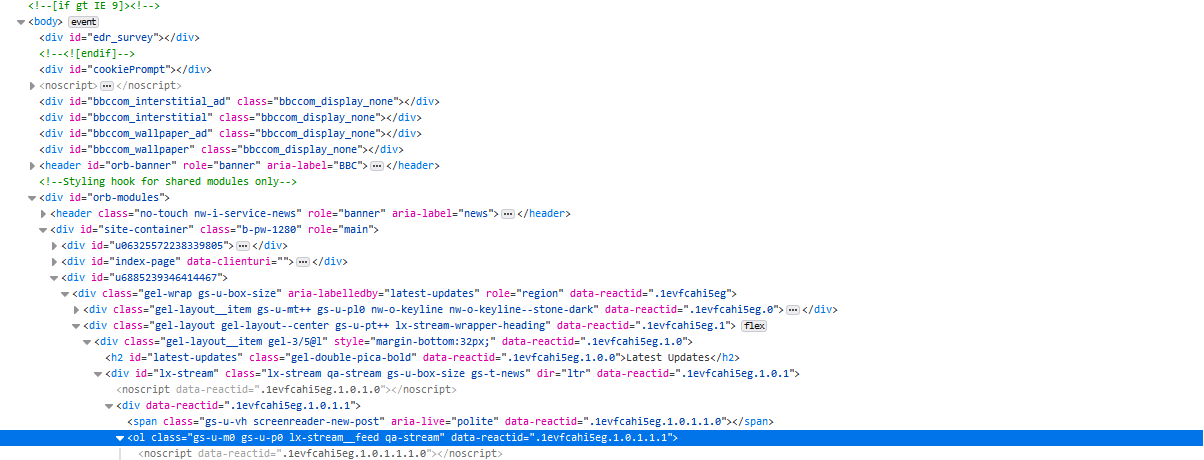

In [2]:
from IPython.display import Image
Image('Doc2-Part3-Image1.png', width='75%')

Once there, it was observed that each story tile was a child of the ordered list element and each target feature usually used a related keyword in its class attribute, as is shown in figure 2:  

```Figure 2: HTML tree for a "Latest News" story tile```  

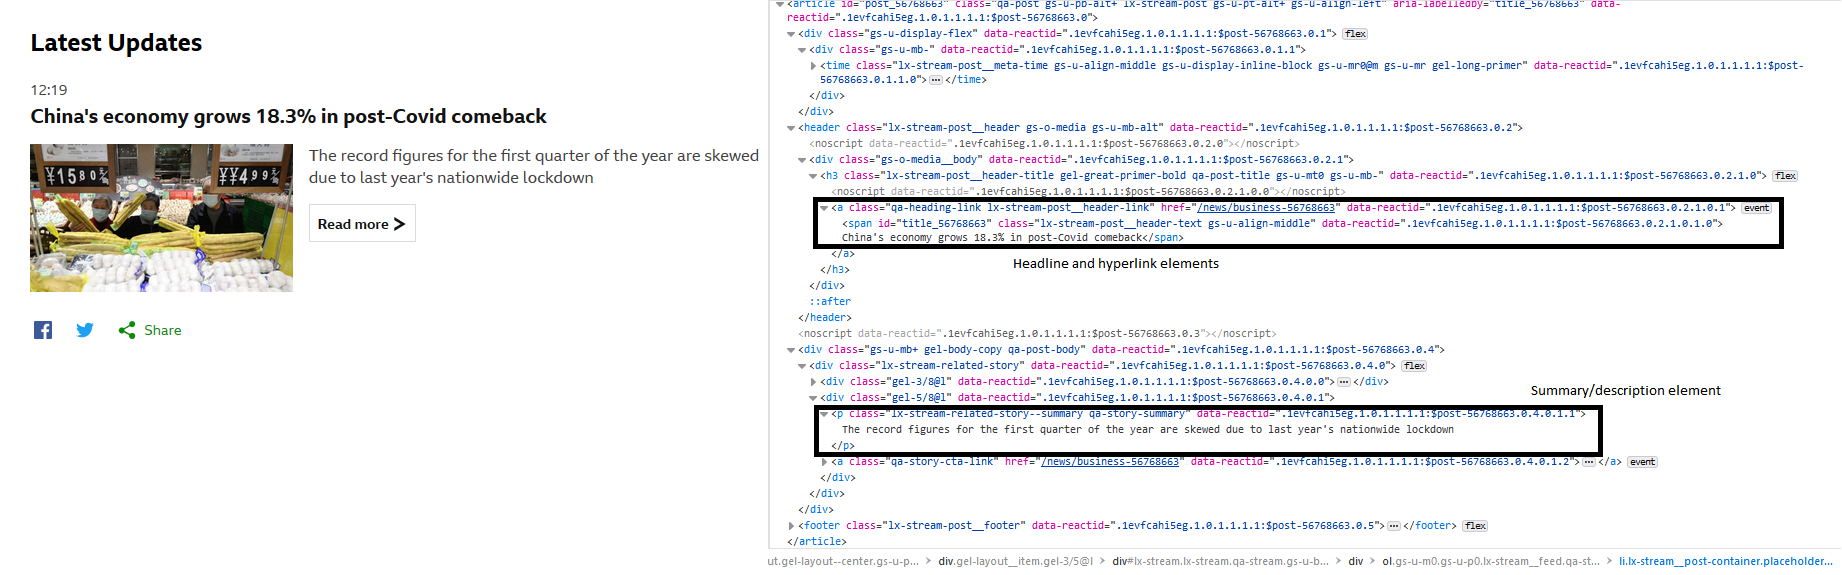

In [25]:
Image('Doc2-Part3-Image2.png', width='75%')

The DOM structure was somewhat easier to navigate once inside the associated hyperlink for the deeper content extraction. For example, all but the article summary were located inside the header element inside the main element and again it was a case of determining what combination of tag and (usually) class attribute would provide a unique result for the scraper. Figure three shows one example:  

```Figure 3: HTML tree for a story accessed with a scraped hyperlink```  

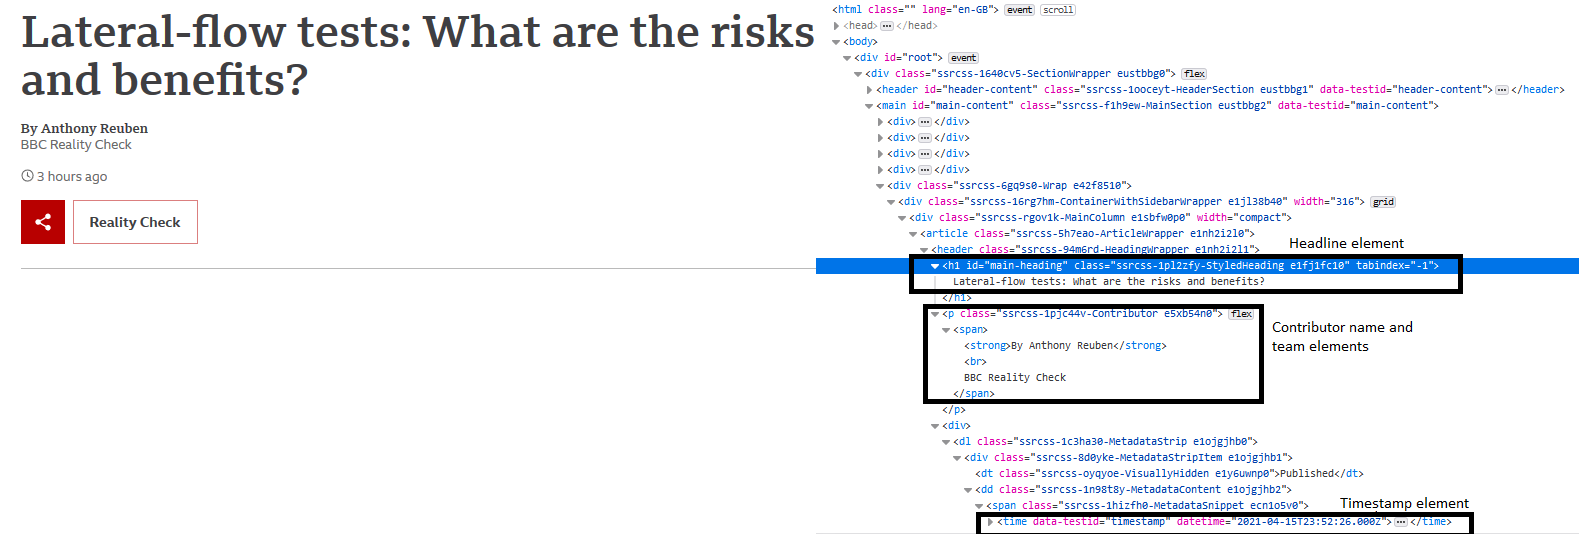

In [26]:
Image('Doc2-Part3-Image3.png', width='75%')

It was concluded that in most cases, a combination of tag name and class attribute were the best approach for identifying target features in the DOM structure. However, it was also observed that for any particular target feature, there were a number of different ways by which it was identified. As a result, the scraper had to try a number of combinations to locate the one being used by that particular webpage (if any).

If the crawler was able to find a match, then the result (whether a text object or an attribute value in the case of the hyperlinks and timestamps) was added to a feature list. If not, an empty string was inserted to ensure that the lists could be aggregated into a dataframe where each row represented the content from one story. The resulting dataframes from the preliminary and deeper content extraction were then joined on their index and saved as an aggregate csv file. The hyperlink list, and the separate dataframes created as part of the preliminary and deeper scrapes were also exported to csv.

Table 1 lists the features (and their non-null counts) in the aggregated csv file prior to, and following, data cleaning:  

```Table 1: Scraped data features and the number of non-null values, pre- and post- data cleaning```  

| Feature | Pre-Cleaning | Post-Cleaning |
| :------ | -----------: | ------------: |
| headline | 8,282 | 6,907 | 
| summary | 7,573 | 6,820 |
| headline2 | 7,289 | 6,773 |
| summary2 | 6,454 | 6,638 |
| category | 5,385 | 4,973 |
| category2 | - | 4,500 |
| timestamp_aus | 7,419[^3] | 6,907 |
| webpage | 8,282[^4] | 6,907 |
| contributor_name | 2,508 | 2,118 |
| contributor_team | 2,453 | 1,910 |
| section | 2,518 | 2,090 |
| subsection | 1,708 | 1,220 |
| hyperlink | 7,430 | 6,907 |

[^3]: The number of *timestamp* non-null values.  
[^4]: The number of *page_name* non-null values.

Given that significant care had been taken during the extraction process to ensure that list contained only one piece of information, only minimum data cleaning was required. This included: removing stories with timestamps older than 2020, replacing strings identical in both *section* and *subsection* will null values in *subsection*, changing the time zone to AEST instead of UTC, and removing erroneous text from *contributor_name* and the summary columns (see Appendix B for the code).  

Preliminary exploratory data analysis was performed on the final dataframe to determine some initial insights about the data extracted by the scraper, which now contained 6,907 stories from 1 January 2020 to 16 April 2021. The first plot in figure four showed that the largest number of stories came from the *Australia* and *Business* webpages and the second plot showed that 71.2 per cent of stories came from the last three months.  

```Image 4: Number of stories by BBC News webpage (LHS) and date of publication (RHS)```  

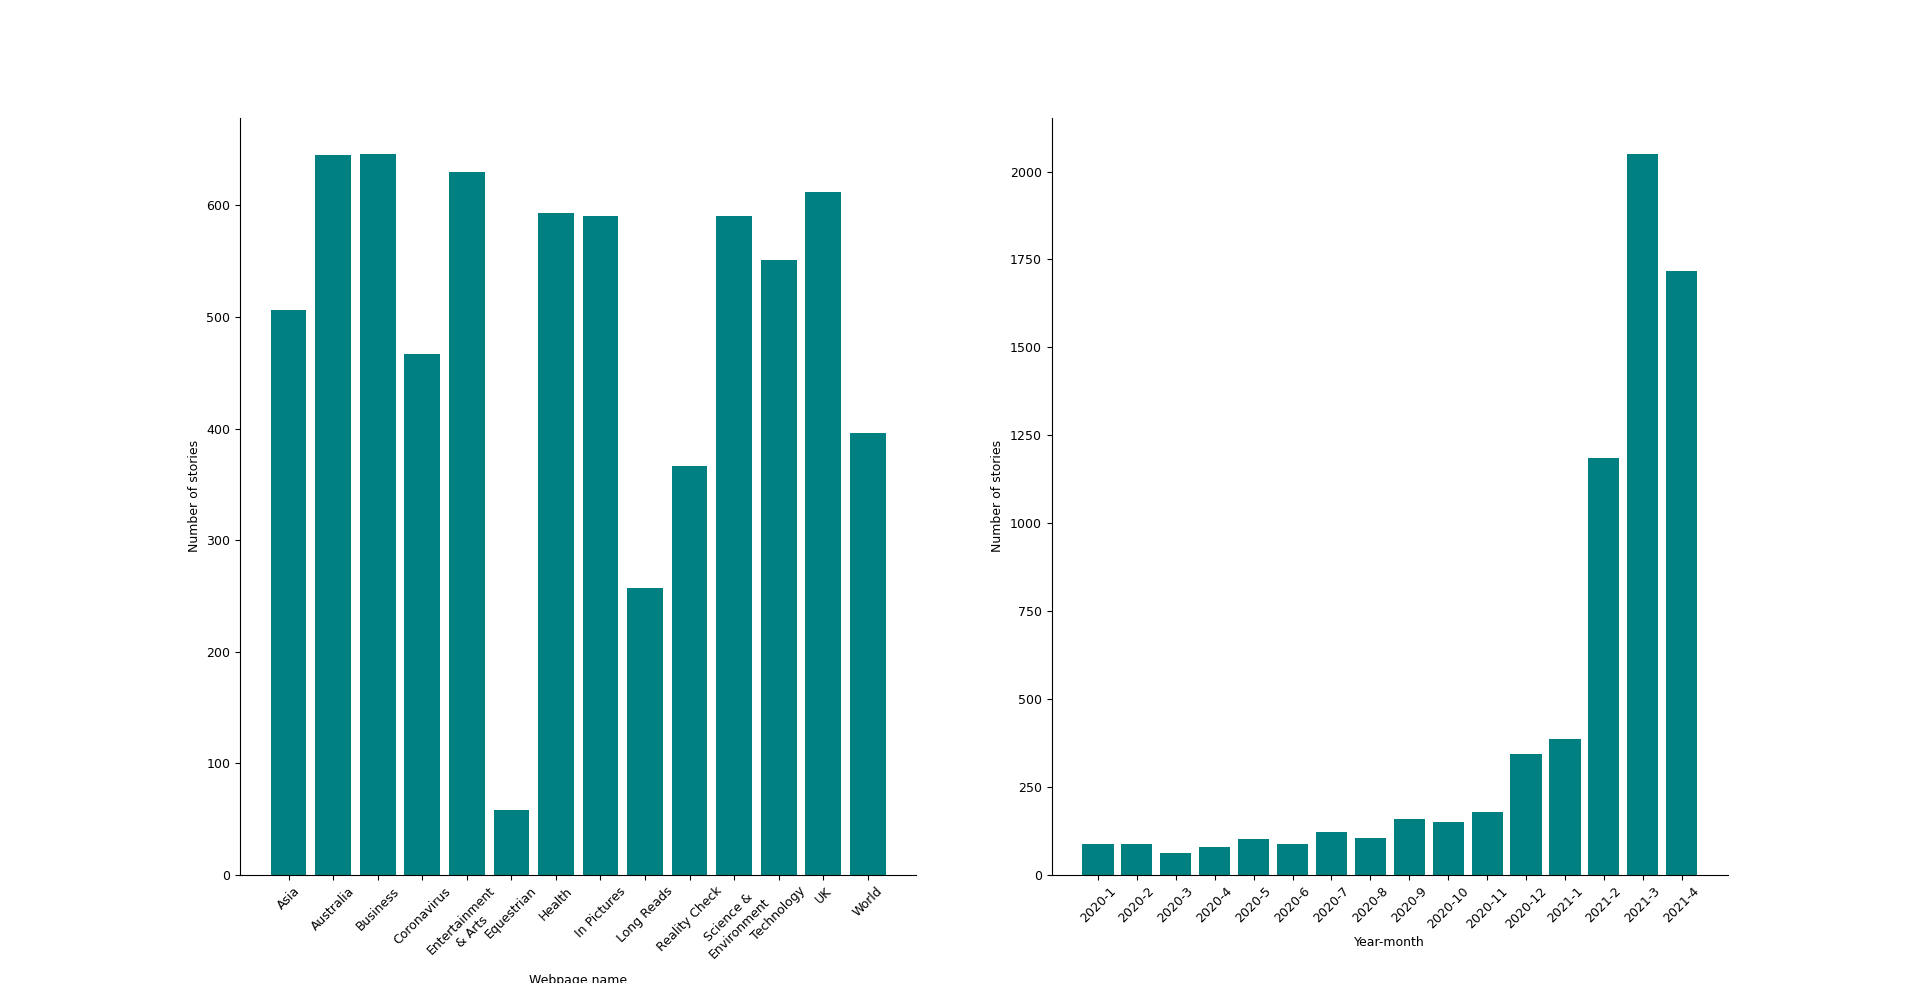

In [10]:
Image('Doc2-Part3-Image4.png', width='100%')

Furthermore, grouping the stories by category indicated that the most popular topic by far was *Coronavirus pandemic*, with *Reality Check*, *Photography*, *Climate change* and *Australia* rounding out the top five. *UK Royal Family* was in position eight and *2020 US election* in position nine (see image 5):  

```Image 4: Number of stories by BBC News category```

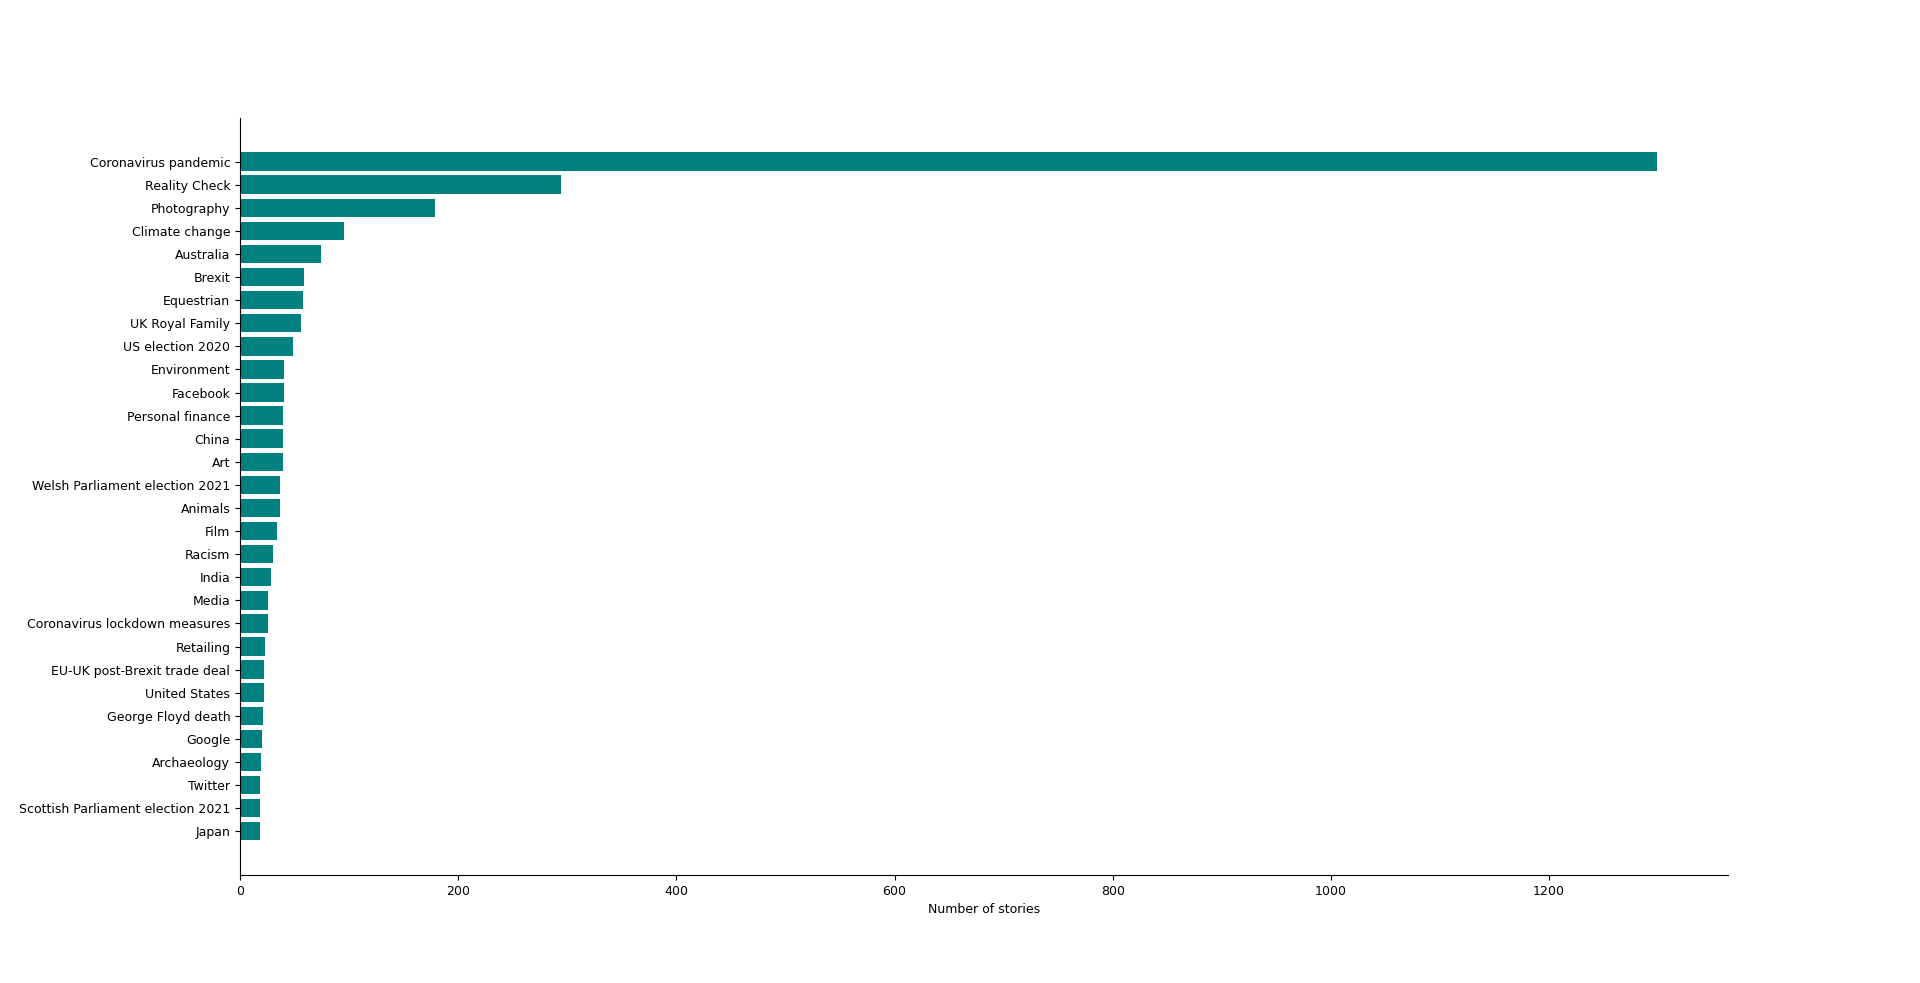

In [3]:
Image('Doc2-Part3-Image5.png', width='100%')

Finally, the mean length of headlines was about 46 characters, with lengths ranging from 13 characters to 125 characters. As expected, the mean length of the summaries were at least twice as long (96 characters for the story tiles and 181 characters for in-story summaries), and ranged between 24 and 1,620 characters. However, it was also apparent that the second summary column had a definite right-skew to its distribution as the 75th quartile was at 179 characters and the standard deviation was much larger than its counterpart *summary*.  

```Figure 6: Number of stories by headline (top) and summary (bottom) lengths```  

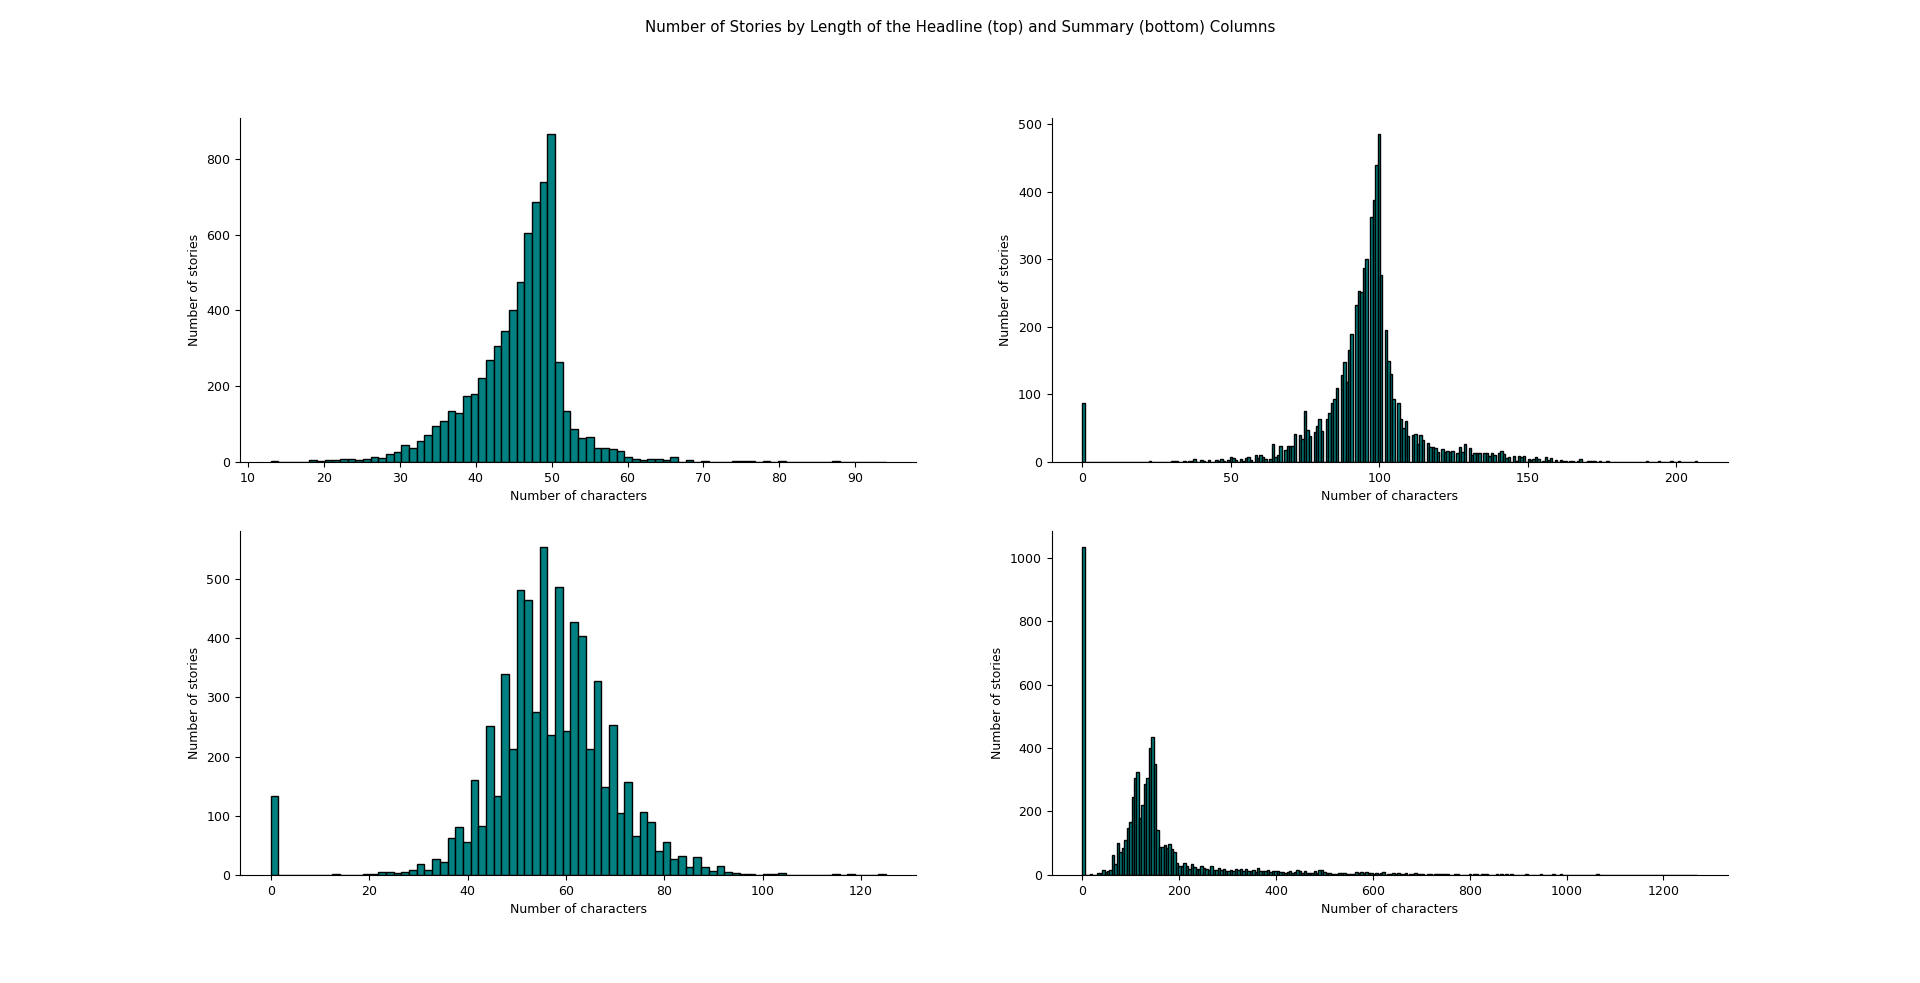

In [12]:
Image('Doc2-Part3-Image6.png', width='100%')

### Part 4 - Web scraper code with screenshots  {-}

The web scraper code is in Appendix A. Details relating to the package requirements and code operation are inside that file.

Figure 7 contains a snapshot of the browser being operated by selenium as article content is extracted (visible only if the scraper is not in headless mode).  

```Figure 7: Selenium-operated browser during content extraction```  

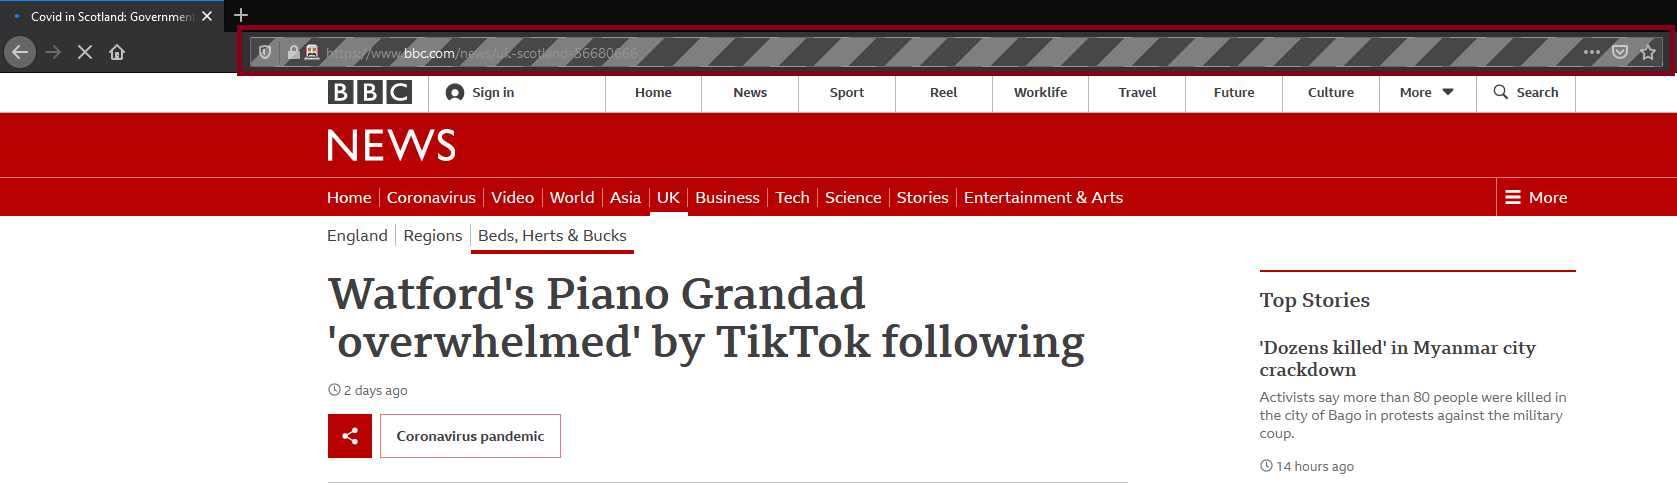

In [20]:
Image('Doc2-Part4-Image1.png', width='75%')

The next four images show the types of messages the user should expect as the scraper works its way through a successful run. Figure 8 shows the messages displayed as the scraper finishes the preliminary scrape of one webpage and starts on the next in the list.  

```Figure 8: Web scraper preliminary scrape in-progress messages```  

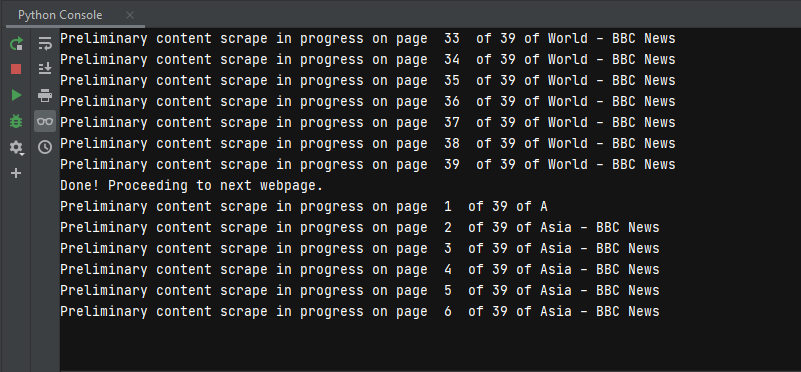

In [23]:
Image('Doc2-Part4-Image2.png', width='50%')

Figure 9 shows the messages displayed as the scraper finished the preliminary scrape and starts on the scrape of content within each story.  

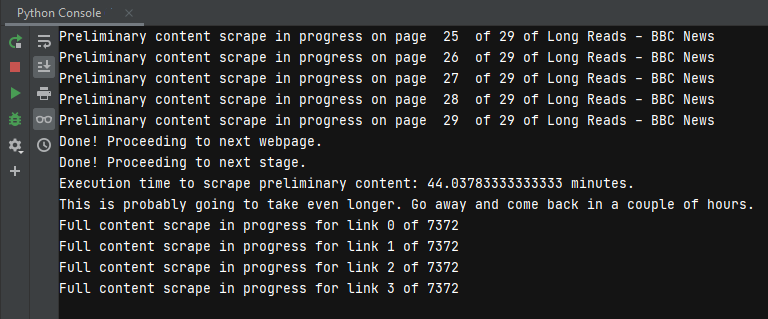

In [22]:
Image('Doc2-Part4-Image3.png', width='50%')

Figure 10 shows the messages displayed at the end of a scrape.  

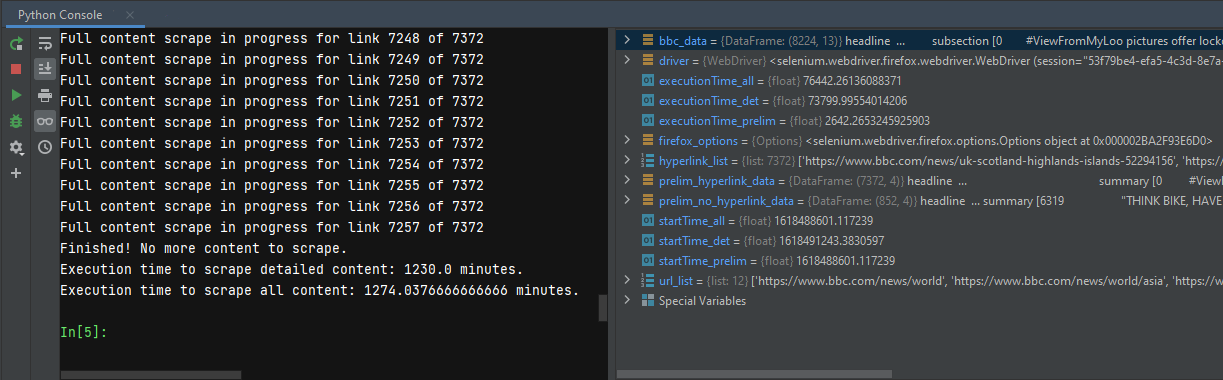

In [21]:
Image('Doc2-Part4-Image4.png', width='75%')

Word count: 1,435 words

### References {-}

The BBC. (2019, 17 October). Can I use BBC content? 
https://www.bbc.co.uk/usingthebbc/terms/can-i-use-bbc-content/

Selenium. (n.d.). The Selenium project and tools.  
https://www.selenium.dev/documentation/en/introduction/the_selenium_project_and_tools/

### Appendix A - Web Scraper Code {-}

This code is also attached as a separate py file.  

In [ ]:
# import necessary libraries
# if the user does not already have selenium installed, then they should visit
# 'https://www.selenium.dev/documentation/en/' for installation instructions and webdriver requirement directions
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import pandas as pd
import time

# establish webdriver and set desired options. Any driver webdriver can be used but the default is Firefox
firefox_options = Options()
firefox_options.add_argument("--incognito")  # browser operates in private/incognito mode
#firefox_options.headless = True  # crawler runs without a visible browser
driver = webdriver.Firefox(options=firefox_options)

# an extra line of code is required if the webdriver is named anything other than 'driver'
# driver = ...

# list of BBC News urls for the scraper to visit
url_list = ['https://www.bbc.com/news/world',
            'https://www.bbc.com/news/world/asia',
            'https://www.bbc.com/news/world/australia',
            'https://www.bbc.com/news/uk',
            'https://www.bbc.com/news/technology',
            'https://www.bbc.com/news/science_and_environment',
            'https://www.bbc.com/news/reality_check',
            'https://www.bbc.com/news/in_pictures',
            'https://www.bbc.com/news/health',
            'https://www.bbc.com/news/entertainment_and_arts',
            'https://www.bbc.com/news/coronavirus',
            'https://www.bbc.com/news/business']


# function to scrape the content available on the "Latest News" section
def scrape_preliminary_content(url_list, num_pages=39):
    # initialise lists
    list_pn = []
    list_h = []
    list_s = []
    list_hl = []

    for url in url_list:
        # navigate to each url in turn and halt execution for two seconds
        driver.get(url)
        time.sleep(2)

        # locate and extract the webpage name and current page number
        page_name = driver.title
        page_current = driver.find_element_by_css_selector(
            'span.lx-pagination__page-number.qa-pagination-current-page-number').text
        # pages_total = driver.find_element_by_css_selector
        # ('span.lx-pagination__page-number.qa-pagination-total-page-number').text

        while int(page_current) < num_pages:
            # halt execution for two seconds and then locate the current page number
            time.sleep(2)
            page_current = driver.find_element_by_css_selector(
                'span.lx-pagination__page-number.qa-pagination-current-page-number').text

            print('Preliminary content scrape in progress on page {} of {} of {}'
                  .format(page_current, str(num_pages), page_name[0]))

            # locate all stories on the current webpage
            stories = driver.find_elements_by_css_selector('li.lx-stream__post-container')

            # locate and extract page name, headline, summary/description information and the hyperlink for each story
            page_name = [driver.title for story in stories]
            headline = [story.find_element_by_css_selector('header.lx-stream-post__header').text for story in stories]
            list_pn.extend(page_name)
            list_h.extend(headline)

            for story in stories:
                try:
                    summary = story.find_element_by_css_selector('p.lx-stream-related-story--summary').text
                except:
                    try:
                        summary = story.find_element_by_css_selector('p.lx-media-asset-summary').text
                    except:
                        summary = ''
                finally:
                    list_s.append(summary)

            for story in stories:
                try:
                    hyperlink = story.find_element_by_css_selector('a.qa-heading-link').get_attribute("href")
                except:
                    hyperlink = ''
                finally:
                    list_hl.append(hyperlink)

            # locate the pagination ribbon and then the button to the next page, click it and halt execution for two
            # seconds
            pagination = driver.find_element_by_css_selector('div.lx-pagination__nav')
            next_button = pagination.find_element_by_css_selector('a[rel="next"]')
            next_button.click()
            time.sleep(2)

        else:
            # let the user know that the while loop is finished (i.e. a progress update)
            print('Done! Proceeding to next webpage.')

    # convert the lists into a set of series and then aggregate into a dataframe
    series_hl = pd.Series(list_hl)
    series_pn = pd.Series(list_pn)
    series_h = pd.Series(list_h)
    series_s = pd.Series(list_s)

    data_dict = {'hyperlink': series_hl,
                 'page_name': series_pn,
                 'headline': series_h,
                 'summary': series_s}

    prelim_df = pd.DataFrame(data_dict)

    # sort the data and drop duplicate headlines
    prelim_deduped = prelim_df.sort_values(by='headline')
    prelim_deduped = prelim_deduped.drop_duplicates(subset='headline', keep='first')

    # split the data by the presence of a hyperlink element
    prelim_hyperlinks = prelim_deduped[prelim_deduped.hyperlink != '']
    prelim_no_hyperlinks = prelim_deduped[prelim_deduped.hyperlink == '']

    return prelim_hyperlinks, prelim_no_hyperlinks


# function to combine the main preliminary content extractor with the customised one for the "Long Reads" webpage as
# it had fewer pages from which to scrape content
def concatenate_preliminary_content(url_list):
    print("This could take a while. Hope you're not pressed for time.")

    prelim_hyperlinks, prelim_no_hyperlinks = scrape_preliminary_content(url_list=url_list)
    prelim_hyperlinks_long, prelim_no_hyperlinks_long = scrape_preliminary_content \
        (url_list=['https://www.bbc.com/news/the_reporters'], num_pages=29)

    print("Done! Proceeding to next stage.")

    frames_hyperlinks = [prelim_hyperlinks, prelim_hyperlinks_long]
    frames_no_hyperlinks = [prelim_no_hyperlinks, prelim_no_hyperlinks_long]

    prelim_hyperlink_data = pd.concat(frames_hyperlinks, sort=True)
    prelim_no_hyperlink_data = pd.concat(frames_no_hyperlinks, sort=True)

    hyperlink_list = prelim_hyperlink_data['hyperlink'].tolist()

    prelim_hyperlink_data['hyperlink'].to_csv('Hyperlink list.csv')
    prelim_hyperlink_data.to_csv("Preliminary hyperlink data.csv")
    prelim_no_hyperlink_data.to_csv("Preliminary no hyperlink data.csv")

    return prelim_hyperlink_data, prelim_no_hyperlink_data, hyperlink_list


# function to scrape the content available within each story with a hyperlink. Follows almost exactly the same
# process as scrape_preliminary_content except the scrape uses a list of hyperlinks instead of a list of URLs
def scrape_detailed_content(hyperlink_list):
    list_status = []
    list_h2 = []
    list_s2 = []
    list_ts = []
    list_cn = []
    list_ct = []
    list_c = []
    list_se = []
    list_ss = []

    for hyperlink in hyperlink_list:
        try:
            driver.get(hyperlink)
            time.sleep(3)

            status = "Success"
            print("Full content scrape in progress for link {} of {}"
                  .format(hyperlink_list.index(hyperlink), len(hyperlink_list)))

            try:
                headline2 = driver.find_element_by_id('main-heading').text
            except:
                try:
                    headline2 = driver.find_element_by_id('lx-event-title').text
                except:
                    try:
                        headline2 = driver.find_element_by_css_selector('h1.gel-trafalgar-bold.qa-story-headline').text
                    except:
                        headline2 = ''
            finally:
                list_h2.append(headline2)

            try:
                summary2 = driver.find_element_by_css_selector('div.ssrcss-3z08n3-RichTextContainer.e5tfeyi2').text
            except:
                try:
                    summary2 = driver.find_element_by_css_selector('b.ssrcss-14iz86j-BoldText.e5tfeyi0').text
                except:
                    try:
                        summary2 = driver.find_element_by_css_selector('ol.lx-c-summary-points.gel-long-primer').text
                    except:
                        try:
                            summary2 = driver.find_element_by_css_selector('p.qa-introduction').text
                        except:
                            summary2 = ''
            finally:
                list_s2.append(summary2)

            try:
                timestamp = driver.find_element_by_css_selector('time[data-testid="timestamp"]') \
                    .get_attribute('datetime')
            except:
                try:
                    timestamp = driver.find_element_by_css_selector('time.gs-o-bullet__text.qa-status-date') \
                        .get_attribute('datetime')
                except:
                    timestamp = ''
            finally:
                list_ts.append(timestamp)

            try:
                contributor_name = driver.find_element_by_css_selector('p.ssrcss-1pjc44v-Contributor.e5xb54n0') \
                    .find_element_by_tag_name('strong').text
            except:
                try:
                    contributor_name = driver.find_element_by_css_selector('span.qa-contributor-name').text
                except:
                    contributor_name = ''
            finally:
                list_cn.append(contributor_name)

            try:
                contributor_team = driver.find_element_by_css_selector('p.ssrcss-1pjc44v-Contributor.e5xb54n0').text
            except:
                try:
                    contributor_team = driver.find_element_by_css_selector('span.qa-contributor-title').text
                except:
                    contributor_team = ''
            finally:
                list_ct.append(contributor_team)

            try:
                category = driver.find_element_by_css_selector('a.ssrcss-1yno9a1-StyledLink.ed0g1kj1').text
            except:
                category = ''
            finally:
                list_c.append(category)

            try:
                section = driver.find_elements_by_css_selector('a.ssrcss-zf4gw3-MetadataLink.ecn1o5v1')[0].text
            except:
                try:
                    section = driver.find_element_by_css_selector('a[href = "/sport/"]').text
                except:
                    section = ''
            finally:
                list_se.append(section)

            try:
                subsection = driver.find_elements_by_css_selector('a.ssrcss-zf4gw3-MetadataLink.ecn1o5v1')[1].text
            except:
                subsection = ''
            finally:
                list_ss.append(subsection)

        except:
            status = "Failure"
            continue
        finally:
            list_status.append(status)

    # notify when detailed content scrape has finished
    print('Finished! No more content to scrape.')

    # shut down driver
    driver.quit()

    # convert all lists produced into pandas Series
    series_status = pd.Series(list_status)
    series_h2 = pd.Series(list_h2)
    series_s2 = pd.Series(list_s2)
    series_ts = pd.Series(list_ts)
    series_cn = pd.Series(list_cn)
    series_ct = pd.Series(list_ct)
    series_c = pd.Series(list_c)
    series_se = pd.Series(list_se)
    series_ss = pd.Series(list_ss)

    # combine pandas Series into a DataFrame
    data_dict = {'scrape_status': series_status,
                 'headline2': series_h2,
                 'summary2': series_s2,
                 'timestamp': series_ts,
                 'contributor_name': series_cn,
                 'contributor_team': series_ct,
                 'category': series_c,
                 'section': series_se,
                 'subsection': series_ss}

    det_data = pd.DataFrame(data_dict)

    return det_data


# function to merge the preliminary content with the detailed content and append the stories without hyperlinks
def concatenate_detailed_content(hyperlink_list, prelim_hyperlink_data, prelim_no_hyperlink_data):
    print("This is probably going to take even longer. Go away and come back in a couple of hours.")
    det_data = scrape_detailed_content(hyperlink_list=hyperlink_list)

    # shut down the driver once scrape is complete
    driver.quit()

    prelim_hyperlink_data.reset_index(inplace=True, drop=True)

    joined_data = pd.merge(prelim_hyperlink_data, det_data, how='left', left_index=True, right_index=True)
    bbc_data = joined_data.append(prelim_no_hyperlink_data)

    bbc_data.to_csv("Part 1 - Scraped data.csv")

    return bbc_data


startTime_all = time.time()
startTime_prelim = time.time()
prelim_hyperlink_data, prelim_no_hyperlink_data, hyperlink_list = concatenate_preliminary_content(url_list)
executionTime_prelim = (time.time() - startTime_prelim)
print('Time taken to scrape preliminary content: {} minutes.'.format(str(round(executionTime_prelim, 2) / 60)))

startTime_det = time.time()
bbc_data = concatenate_detailed_content(hyperlink_list, prelim_hyperlink_data, prelim_no_hyperlink_data)
executionTime_det = (time.time() - startTime_det)
print('Time taken to scrape detailed content: {} minutes.'.format(str(round(executionTime_det, 2) / 60)))

executionTime_all = (time.time() - startTime_all)
print('Time taken for the entire webscrape: {} minutes.'.format(str(round(executionTime_all, 2) / 60)))


### Appendix B - Data Cleaning and Exploratory Data Analysis {-}

This code is also attached as a separate py file.  

In [ ]:
# import packages
import maya
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read in the data
data = pd.read_csv("Part 1 - Scraped data.csv", index_col=0)

# parse timestamp column into a datetime format and convert to the local timezone
data['timestamp_aus'] = data.timestamp.apply(lambda x: x if pd.isna(x) else maya.parse(x)
                                             .datetime(to_timezone='Australia/Melbourne', naive=False))
data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True)

# drop rows with timestamp older than 2020
data = data[data['timestamp'].dt.year >= 2020]

# drop duplicates based on headline column value and keep only first value
data.sort_values(by='headline', inplace=True)
data.drop_duplicates(subset='headline', inplace=True)

# replace subsection column values with nan if value is the same as section column
data.subsection = data.apply(lambda x: x.subsection if x.subsection != x.section else np.nan, axis=1)

# split page_name in two and drop the column
pattern = " - "
page_name_split = data.page_name.apply(lambda x: x.split(pattern, 1))
data['webpage'] = page_name_split.apply(lambda x: x[0])
data['website'] = page_name_split.apply(lambda x: x[1])
data.drop('page_name', axis=1, inplace=True)

# remove "By" from contributor_name and "." from contributor_team
data.contributor_name = data.contributor_name.str.replace("By ", "", regex=False)
data.contributor_team = data.contributor_team.str.replace(".", "", regex=False)

# split contributor_team by newline and retain only the second half
data.contributor_team = data.contributor_team.fillna('')
data.contributor_team = data.contributor_team.apply(lambda x: x if x == '' else x.split('\n')) \
    .apply(lambda x: x[1] if len(x) > 1 else '')

# count the length of summaries to find those that are too short (i.e. contain useless data)
data[['summary', 'summary2']] = data[['summary', 'summary2']].fillna('')

data['summary_length'] = data.summary.apply(lambda x: len(x))
data = data.sort_values(by="summary_length")
data['summary2_length'] = data.summary2.apply(lambda x: len(x))
data = data.sort_values(by="summary2_length")

# replace any summaries with selected strings with np.nan
data.summary = data.summary.apply(lambda x: np.nan if (x == "." or x == "") else x)

data.summary2 = data.summary2.apply(lambda x: np.nan if (x == "."
                                                         or x == "As"
                                                         or x == "The"
                                                         or x == "Claim:"
                                                         or x == "REPORT:"
                                                         or x == "Read more"
                                                         or x == "The claim:"
                                                         or x == "Read more:"
                                                         or x == "READ MORE:"
                                                         or x == "See more at"
                                                         or x == "WATCH MORE:"
                                                         or x == "Follow us on"
                                                         or x == "The government's"
                                                         or x == "All photographs courtesy"
                                                         or x == "All images are copyrighted."
                                                         or x == "Ceri Oakes - Whitby, Yorkshire"
                                                         or x == "All photos subject to copyright"
                                                         or x == "All images subject to copyright"
                                                         or x == "All photos subject to copyright."
                                                         or x == "All images subject to copyright."
                                                         or x == "All photographs courtesy teNeues."
                                                         or x == "All photographs © Corinne Rozotte."
                                                         or x == "All photographs subject to copyright"
                                                         or x == "Images: Reuters, EPA and Getty Images"
                                                         or x == "All photographs courtesy the artists."
                                                         or x == "All photographs subject to copyright."
                                                         or x == "All photographs courtesy Ordnance Survey"
                                                         or x == "All photographs courtesy Dan Giannopoulos") else x)

# create new 'category' column with 'Reality Check' and 'Photography' replaced by nans
data['category2'] = data.category.replace(to_replace=["Reality Check", "Photography"], value=[np.nan, np.nan])

# drop extra/unnecessary columns
data.drop(['summary_length', 'summary2_length', 'scrape_status', 'timestamp', 'website'], axis=1, inplace=True)

# replace '' with nan
data.replace('', np.nan, inplace=True)

# re-order columns
new_order = [0, 2, 3, 4, 7, 12, 10, 11, 5, 6, 8, 9, 1]
data = data[data.columns[new_order]]

data.to_csv("Part 2 - Cleaned data.csv")
data = pd.read_csv("Part 2 - Cleaned data.csv", index_col=0)
data['timestamp_aus'] = data.timestamp_aus.apply(lambda x: x if pd.isna(x) else maya.parse(x)
                                                 .datetime(to_timezone='Australia/Melbourne', naive=False))

# dataset shape and non-null counts
print("The dataset has {} rows and {} columns.".format(data.shape[0], data.shape[1]))
num_rows = data.shape[0]
num_cols = data.shape[1]

data.info()
data_stats = data.describe(datetime_is_numeric=True)

date_from = min(data.timestamp_aus)
date_to = max(data.timestamp_aus)

# number of rows by different columns
counts_webpage = data.webpage.value_counts()
counts_category = data.category.value_counts()
counts_category2 = data.category2.value_counts()
counts_section = data.section.value_counts()
counts_subsection = data.subsection.value_counts()
counts_contributor_name = data.contributor_name.value_counts()
counts_contributor_team = data.contributor_team.value_counts()

# sort story numbers by webpage name instead of count
counts_webpage_s = counts_webpage.sort_index()

# create custom category labels for the stories-by-date bar chart
timestamp_df = pd.DataFrame(data.loc[:, 'timestamp_aus'])
timestamp_df['year'] = pd.DatetimeIndex(data['timestamp_aus']).year
timestamp_df['month'] = pd.DatetimeIndex(data['timestamp_aus']).month
timestamp_df['year-month'] = timestamp_df.apply(lambda x: str(x.year) + "-" + str(x.month), axis=1)
timestamp_counts = timestamp_df['year-month'].value_counts().reset_index()

dateorder = ['2020-1', '2020-2', '2020-3', '2020-4', '2020-5', '2020-6', '2020-7', '2020-8', '2020-9', '2020-10',
             '2020-11', '2020-12', '2021-1', '2021-2', '2021-3', '2021-4']
timestamp_counts['index'] = pd.Categorical(timestamp_counts['index'], categories=dateorder, ordered=True)
timestamp_counts = timestamp_counts.sort_values(by='index')
timestamp_counts.rename(columns={'index': 'year/month', 'year-month': 'count'}, inplace=True)

# change (reduce) text size
plt.rcParams.update({'font.size': 9})
webpage_labels = ['Asia', 'Australia', 'Business', 'Coronavirus', 'Entertainment\n& Arts', 'Equestrian', 'Health',
                  'In Pictures', 'Long Reads', 'Reality Check', 'Science &\nEnvironment', 'Technology', 'UK', 'World']

fig, axs = plt.subplots(1, 2)
axs[0].bar(webpage_labels, counts_webpage_s, color='teal')
axs[0].set_xlabel('Webpage name')
axs[0].set_ylabel('Number of stories')
axs[0].tick_params(axis='x', labelrotation=45)  # labelsize=8
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[1].bar(timestamp_counts['year/month'], timestamp_counts['count'], color='teal')
axs[1].set_xlabel('Year-month')
axs[1].set_ylabel('Number of stories')
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False);
# plt.show()


# summary stats for  of headline, headline2 and summary string lengths
corpus_data = data.loc[:, ['headline', 'headline2', 'summary', 'summary2']]
corpus_data['headline_string_length'] = corpus_data.headline.apply(lambda x: len(x))
corpus_data['headline2_string_length'] = corpus_data.headline2.apply(lambda x: 0 if pd.isna(x) else len(x))
corpus_data['summary_string_length'] = corpus_data.summary.apply(lambda x: 0 if pd.isna(x) else len(x))
corpus_data['summary2_string_length'] = corpus_data.summary2.apply(lambda x: 0 if pd.isna(x) else len(x))

corpus_stats = corpus_data.loc[:, ['headline_string_length',
                                   'headline2_string_length',
                                   'summary_string_length',
                                   'summary2_string_length']].describe()

# reset plot configurations to default
plt.rcdefaults()

# histograms of headline and summary string lengths
# reduce the text size used in the plots
plt.rcParams.update({'font.size': 9})

fig, axs = plt.subplots(2, 2)
fig.suptitle("Number of Stories by Length of the Headline (top) and Summary (bottom) Columns")
axs[0, 0].hist(corpus_data.headline_string_length, bins=80, edgecolor="black", color="teal")
axs[0, 0].spines['right'].set_visible(False)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].set_xlabel('Number of characters')
axs[0, 0].set_ylabel('Number of stories')
axs[0, 1].hist(corpus_data.summary_string_length, bins=250, edgecolor="black", color="teal")
axs[0, 1].spines['right'].set_visible(False)
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].set_xlabel('Number of characters')
axs[0, 1].set_ylabel('Number of stories')
axs[1, 0].hist(corpus_data.headline2_string_length, bins=80, edgecolor="black", color="teal")
axs[1, 0].spines['right'].set_visible(False)
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].set_xlabel('Number of characters')
axs[1, 0].set_ylabel('Number of stories')
axs[1, 1].hist(corpus_data.summary2_string_length, bins=250, edgecolor="black", color="teal")
axs[1, 1].spines['right'].set_visible(False)
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].set_xlabel('Number of characters')
axs[1, 1].set_ylabel('Number of stories');

# if not working in interactive mode, you need to include the following:
# plt.show()

# reset plot configurations to default / change text size used in plots
# plt.rcdefaults()
# plt.rcParams.update({'font.size':9})

# category data bar charts
fig, ax = plt.subplots()
ax.barh(counts_category.index[:30], counts_category[:30], color='teal')
ax.invert_yaxis()
ax.set_xlabel('Number of stories')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);
# plt.show()

fig, ax = plt.subplots()
ax.barh(counts_category2.index[:30], counts_category2[:30], color='teal')
ax.invert_yaxis()
ax.set_xlabel('Number of stories')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);
# plt.show()